In [93]:
import pandas as pd
pd.options.display.max_rows= 400
pd.options.display.max_columns= 400
import matplotlib.pyplot as plt

In [94]:
csv="/workspaces/PYTHON_COURSE_2024/source/trump_insult_tweets_2014_to_2021.csv"
df_trump=pd.read_csv(csv)

In [133]:
df_trump
# attribute date in "date" column to day of the week and add day of the week to a new column adjacent to the index of date column
df_trump['date'] = pd.to_datetime(df_trump['date'])
df_trump['day_of_week'] = df_trump['date'].dt.day_name()
df_trump
# there were only few number of tweets in 2016 and 2021, so here I remove the data  of 2016 and 2021
df_trump = df_trump[df_trump['date'].dt.year != 2016]
df_trump = df_trump[df_trump['date'].dt.year != 2021]


df_trump

# what is the total number of tweets in all years
total_tweets = df_trump.shape[0]
total_tweets






8035

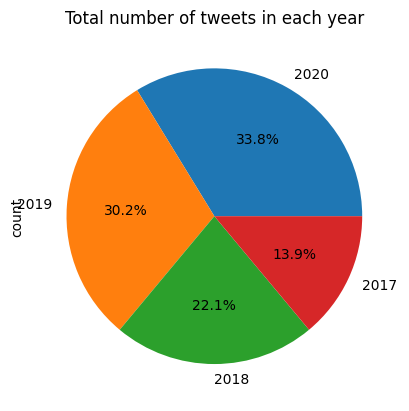

In [135]:
#  what is the total number of tweets in each year
tweets_per_year = df_trump['date'].dt.year.value_counts()
tweets_per_year

# make a circle plot of the total number of tweets in each year
tweets_per_year.plot.pie(autopct='%1.1f%%')
plt.title('Total number of tweets in each year')
plt.show()


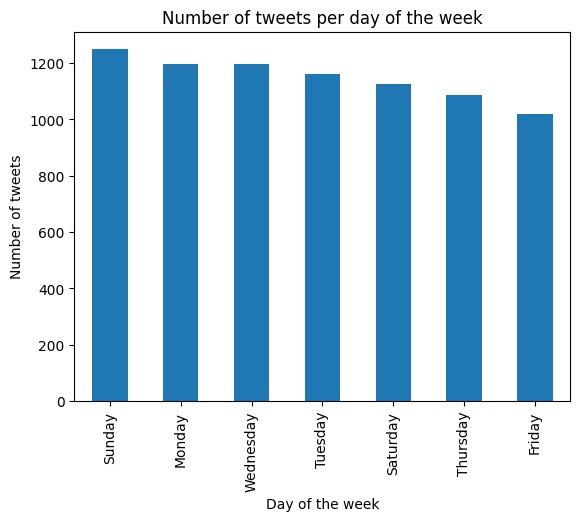

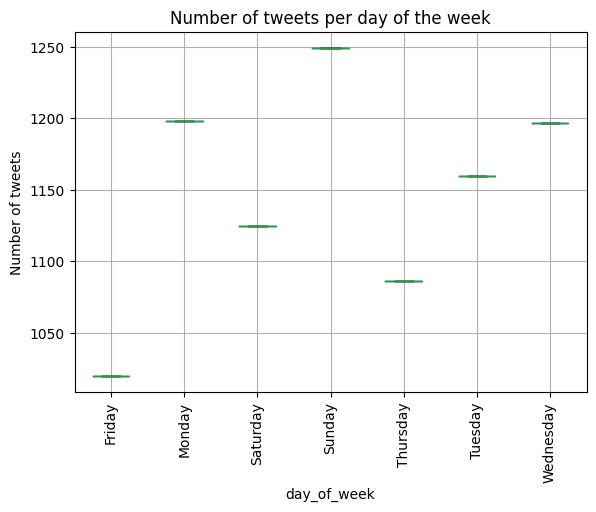

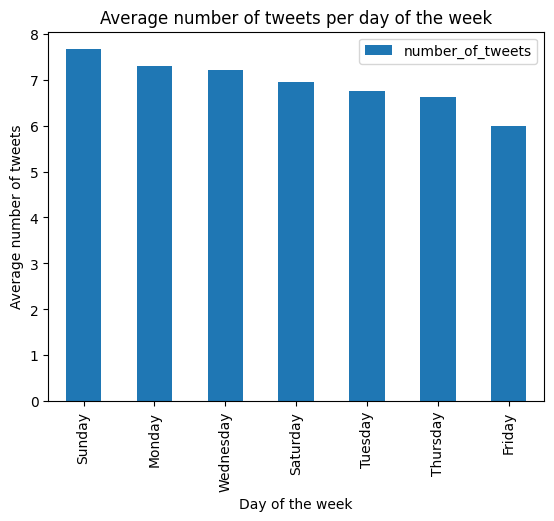

/tmp/ipykernel_6862/2733179728.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_trump['day_of_week'].value_counts(), shade=True)


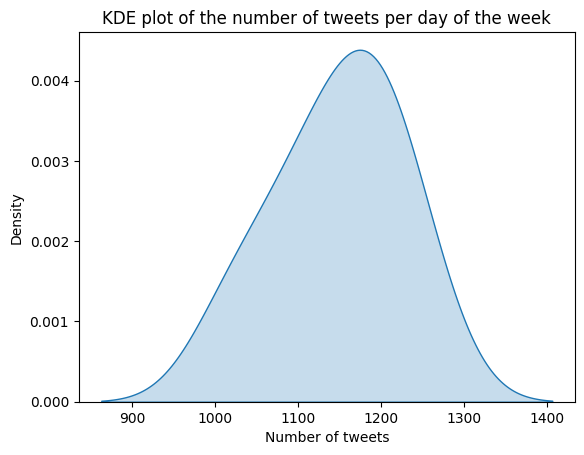

In [136]:
# show the number of tweets per day of the week
df_trump['date'] = df_trump['date'].astype(str)
df_trump['day_of_week'].value_counts().plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Number of tweets')
plt.title('Number of tweets per day of the week')
plt.show()

# create a df with the number of tweets per day of the week
df_day_of_week = df_trump['day_of_week'].value_counts().reset_index()
df_day_of_week.columns = ['day_of_week', 'number_of_tweets']
df_day_of_week

# make a boxplot of df_day_of_week , sort ascending by day_of_week
df_day_of_week = df_day_of_week.sort_values(by='day_of_week')
df_day_of_week.boxplot(column='number_of_tweets', by='day_of_week', rot=90)
plt.ylabel('Number of tweets')
plt.title('Number of tweets per day of the week')
plt.suptitle('')
plt.show()

# list the number of tweets per day per year
df_day_of_week_per_year = df_trump.groupby(['date', 'day_of_week']).size().reset_index()
df_day_of_week_per_year.columns = ['date', 'day_of_week', 'number_of_tweets']
df_day_of_week_per_year
# take the average number of tweets per each individial day in df_day_of_week_per_year
df_day_of_week_per_year = df_day_of_week_per_year.groupby('day_of_week')['number_of_tweets'].mean().reset_index()
df_day_of_week_per_year = df_day_of_week_per_year.sort_values(by='number_of_tweets', ascending=False)
df_day_of_week_per_year
# average number of tweets per each individual day for each year
df_day_of_week_per_year = df_trump.groupby(['date', 'day_of_week']).size().reset_index()
df_day_of_week_per_year.columns = ['date', 'day_of_week', 'number_of_tweets']
df_day_of_week_per_year = df_day_of_week_per_year.groupby('day_of_week')['number_of_tweets'].mean().reset_index()
df_day_of_week_per_year = df_day_of_week_per_year.sort_values(by='number_of_tweets', ascending=False)
df_day_of_week_per_year
# make a barplot of df_day_of_week_per_year
df_day_of_week_per_year.plot(kind='bar', x='day_of_week', y='number_of_tweets')
plt.xlabel('Day of the week')
plt.ylabel('Average number of tweets')
plt.title('Average number of tweets per day of the week')
plt.show()



# make KDE plot of the number of tweets per day of the week
import seaborn as sns
sns.kdeplot(df_trump['day_of_week'].value_counts(), shade=True)
plt.xlabel('Number of tweets')
plt.ylabel('Density')
plt.title('KDE plot of the number of tweets per day of the week')
plt.show()





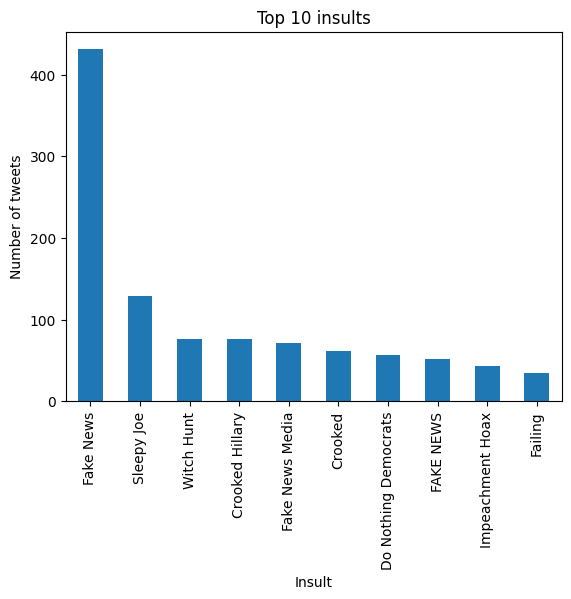

In [138]:
# in df_trump, get the number of each insult 
insults = df_trump['insult'].value_counts()
insults
# make a barplot of top 10 insults
insults.head(10).plot(kind='bar')
plt.xlabel('Insult')
plt.ylabel('Number of tweets')
plt.title('Top 10 insults')
plt.show()


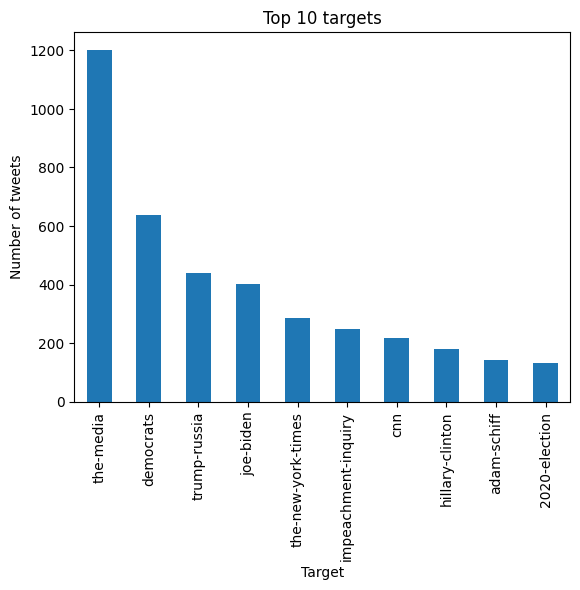

In [139]:
# in df_trump, get the number of each target
targets = df_trump['target'].value_counts()
targets
# make a barplot of top 10 targets
targets.head(10).plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Number of tweets')
plt.title('Top 10 targets')
plt.show()


ValueError: Unknown format code 'd' for object of type 'float'

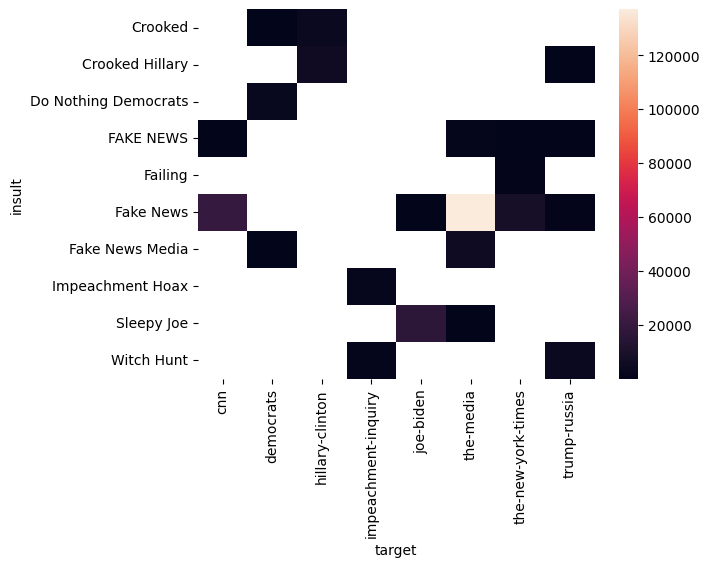

In [145]:
# make a df that shows which insult was used against which target for the top 10 insults and targets
df_top_10_insults = df_trump['insult'].value_counts().head(10).reset_index()
df_top_10_insults.columns = ['insult', 'number_of_tweets']
df_top_10_targets = df_trump['target'].value_counts().head(10).reset_index()
df_top_10_targets.columns = ['target', 'number_of_tweets']
df_top_10_insults
df_top_10_targets
# merge df_top_10_insults and df_top_10_targets
df_top_10_insults_targets = pd.merge(df_trump, df_top_10_insults, on='insult')
df_top_10_insults_targets = pd.merge(df_top_10_insults_targets, df_top_10_targets, on='target')
df_top_10_insults_targets = df_top_10_insults_targets[['insult', 'target', 'number_of_tweets_x', 'number_of_tweets_y']]
df_top_10_insults_targets.columns = ['insult', 'target', 'number_of_tweets_insult', 'number_of_tweets_target']
df_top_10_insults_targets
# make a heatmap of df_top_10_insults_targets
df_top_10_insults_targets = df_top_10_insults_targets.pivot_table(index='insult', columns='target', values='number_of_tweets_insult', aggfunc='sum')
sns.heatmap(df_top_10_insults_targets, annot=True, fmt='d')
plt.xlabel('Target')
plt.ylabel('Insult')
plt.title('Number of tweets per insult per target')
plt.show()




ValueError: Unknown format code 'd' for object of type 'float'

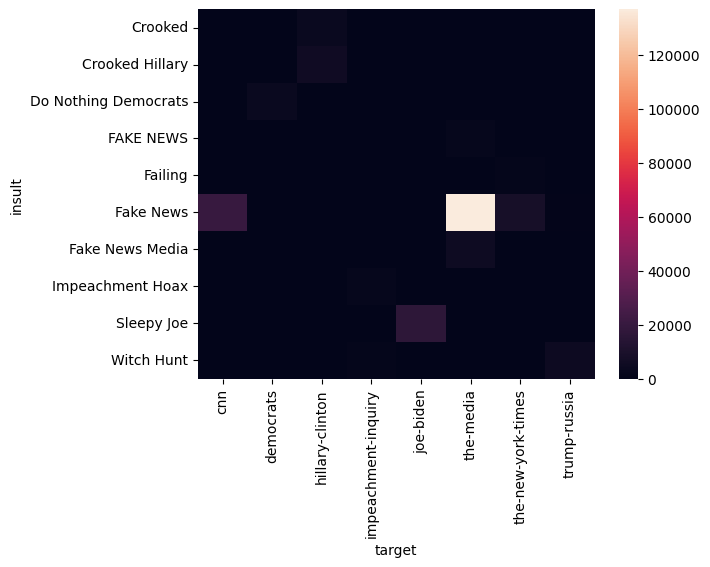

In [149]:
#make heatmap of the number of tweets per insult per target for the top 10 insults and targets
df_top_10_insults_targets = df_top_10_insults_targets.fillna(0)
sns.heatmap(df_top_10_insults_targets, annot=True, fmt='d')
plt.xlabel('Target')
plt.ylabel('Insult')
plt.title('Number of tweets per insult per target')
plt.show()


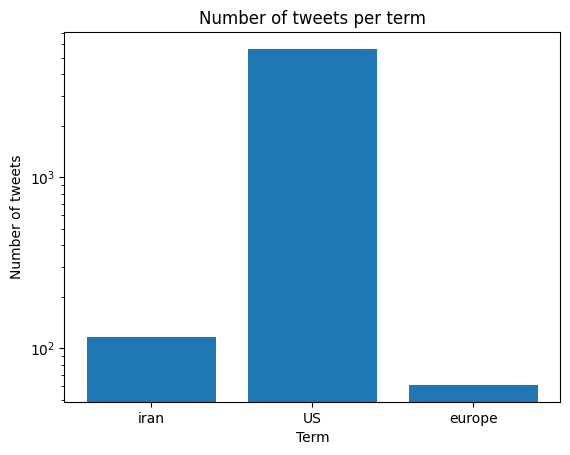

In [172]:
# number of the term "iran" in df_trump "tweet", "target" and "insult" columns and sum up the results
iran = df_trump['tweet'].str.contains('iran', case=False).sum() + df_trump['target'].str.contains('iran', case=False).sum() + df_trump['insult'].str.contains('iran', case=False).sum()
iran

# number of the term "US" in df_trump "tweet", "target" and "insult" columns and sum up the results
US = df_trump['tweet'].str.contains('US', case=False).sum() + df_trump['target'].str.contains('US', case=False).sum() + df_trump['insult'].str.contains('US', case=False).sum()
US

# number of the term "Europe" in df_trump "tweet", "target" and "insult" columns and sum up the results
europe = df_trump['tweet'].str.contains('europe', case=False).sum() + df_trump['target'].str.contains('europe', case=False).sum() + df_trump['insult'].str.contains('europe', case=False).sum()
europe

# make a bar plot of iran, US and europe, log scale
plt.bar(['iran', 'US', 'europe'], [iran, US, europe])
plt.yscale('log')
plt.xlabel('Term')
plt.ylabel('Number of tweets')
plt.title('Number of tweets per term')
plt.show()



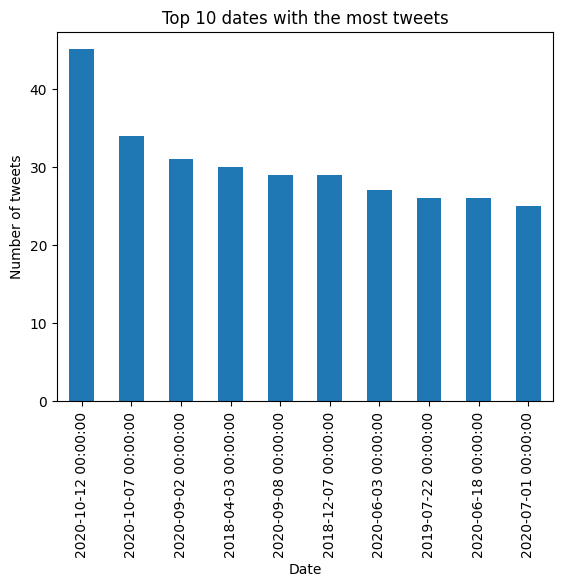

DatetimeIndex(['2020-10-12', '2020-10-07', '2020-09-02', '2018-04-03',
               '2020-09-08', '2018-12-07', '2020-06-03', '2019-07-22',
               '2020-06-18', '2020-07-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [178]:
# the dates with the most tweets top 10
df_trump['date'] = pd.to_datetime(df_trump['date'])
df_trump['date'].value_counts().head(10)
# make a bar plot of the top 10 dates with the most tweets
df_trump['date'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Top 10 dates with the most tweets')
plt.show()

# store the top 10 dates and the context with the most tweets in a variable
top_10_dates = df_trump['date'].value_counts().head(10).reset_index()
top_10_dates.columns = ['date', 'number_of_tweets']
top_10_dates






NameError: name 'df_top_10_dates' is not defined